# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
df = df.drop(df.columns[11:21], axis = 1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [6]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
fetal_health                                              0
dtype: int64

In [7]:
# baseline accuracy
# 1 = Normal, 2 = Suspect, 3 = Pathological
df['fetal_health'].value_counts(normalize = True)

# Data is imbalanced, we could try SMOTE

1.0    0.778457
2.0    0.138758
3.0    0.082785
Name: fetal_health, dtype: float64

In [8]:
corr = df.corr()

In [9]:
above0_df = corr[corr['fetal_health'] > 0]
above0_df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,-0.032091,0.148151
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,0.011047,0.088010
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,-0.242932,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,-0.037667,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,-0.226514,0.484859


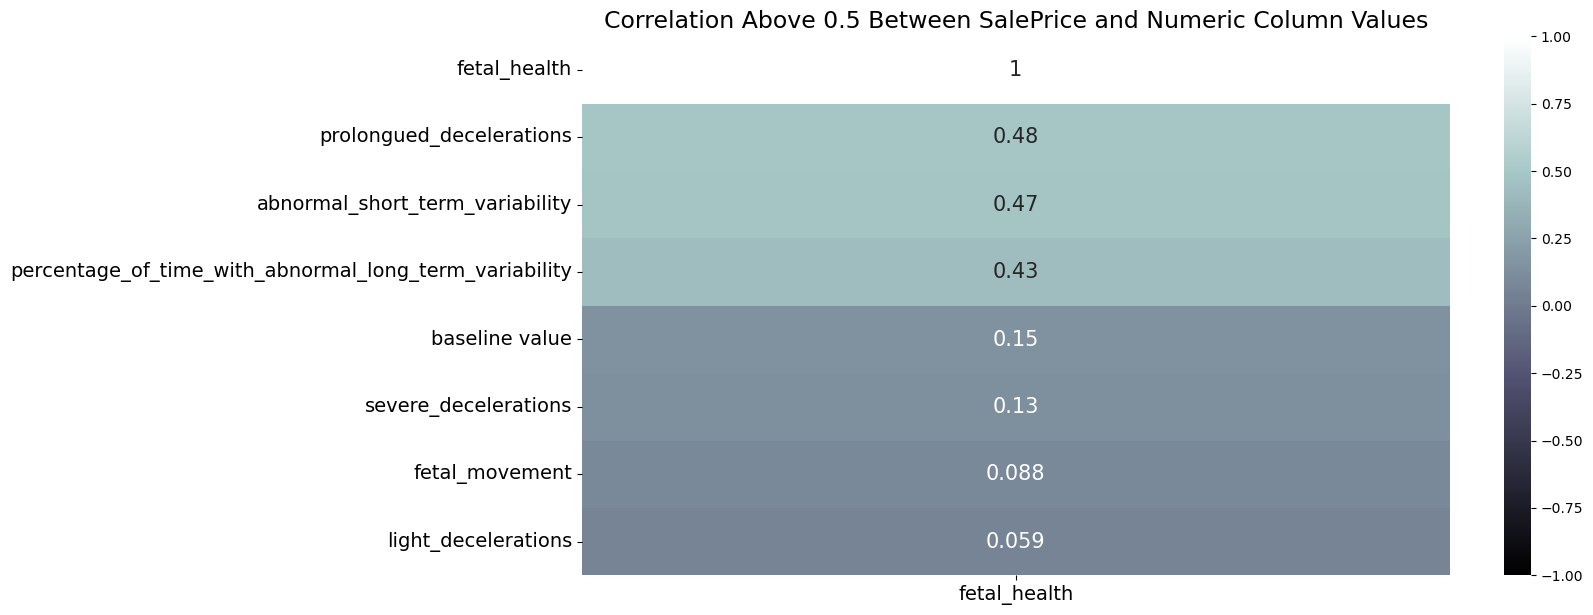

In [10]:
plt.figure(figsize = (14,7))
sns.heatmap(above0_df[['fetal_health']].sort_values(by = 'fetal_health', ascending = False),
           cmap = 'bone',
           vmin = -1,
           vmax = 1,
           annot = True,
           annot_kws={'size': 15})
plt.title('Correlation Above 0.5 Between SalePrice and Numeric Column Values', size = 17)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14);

In [11]:
# Notes:
# prolonged deceleration relates to the fetal health rate pattern
# abnormal short term variability is the beat-to-beat variation in fetal heart rate

In [12]:
below0_df = corr[corr['fetal_health'] < 0]
below0_df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,-0.142363,-0.364066
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,-0.066058,-0.204894
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,0.073892,-0.103382
mean_value_of_long_term_variability,-0.032091,-0.142363,0.011047,-0.066058,-0.242932,-0.037667,-0.226514,-0.315105,0.073892,-0.171114,1.000000,-0.226797


(array([0.5]), [Text(0.5, 0, 'fetal_health')])

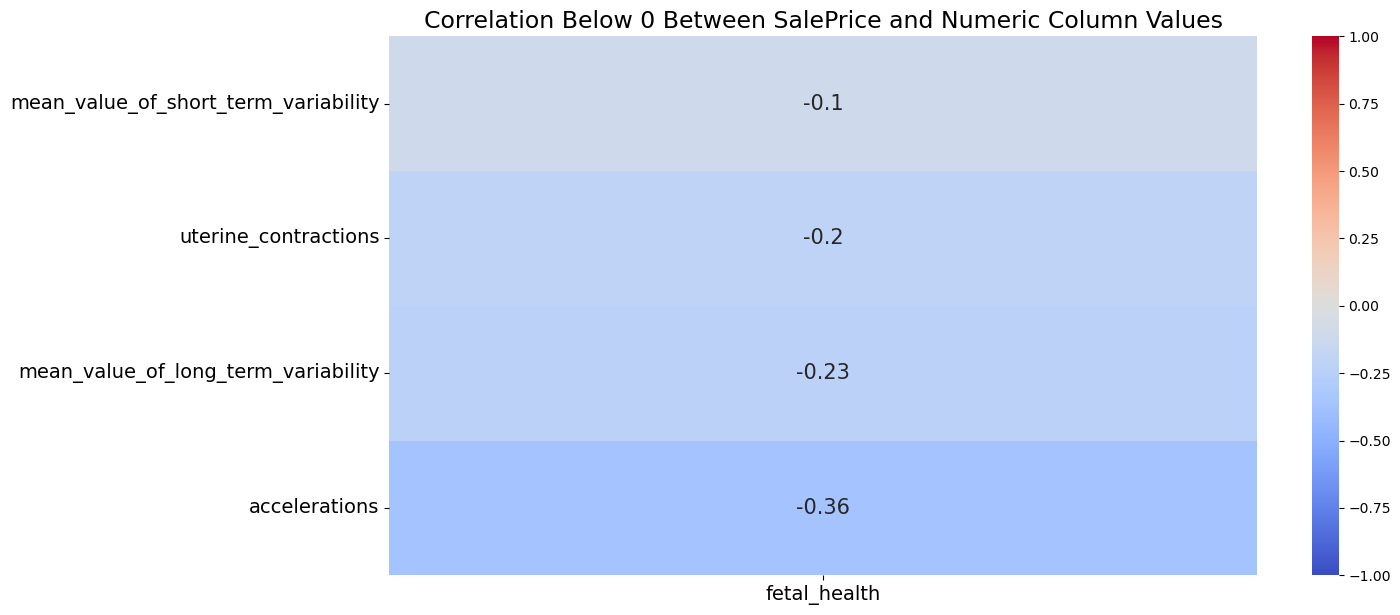

In [13]:
plt.figure(figsize = (14,7))
sns.heatmap(below0_df[['fetal_health']].sort_values(by = 'fetal_health', ascending = False),
           cmap = 'coolwarm',
           vmin = -1,
           vmax = 1,
           annot = True,
           annot_kws={'size': 15})
plt.title('Correlation Below 0 Between SalePrice and Numeric Column Values', size = 17)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)

In [14]:
# accelerations: increase in frequency or strength of fetal movements
# neg correlation: one variable increases, the other decreases (but keep in mind, 1 is good in this case)
# decrease in accelerations = increase in fetal risk 

In [15]:
# boxplot of accelerations and fetal health

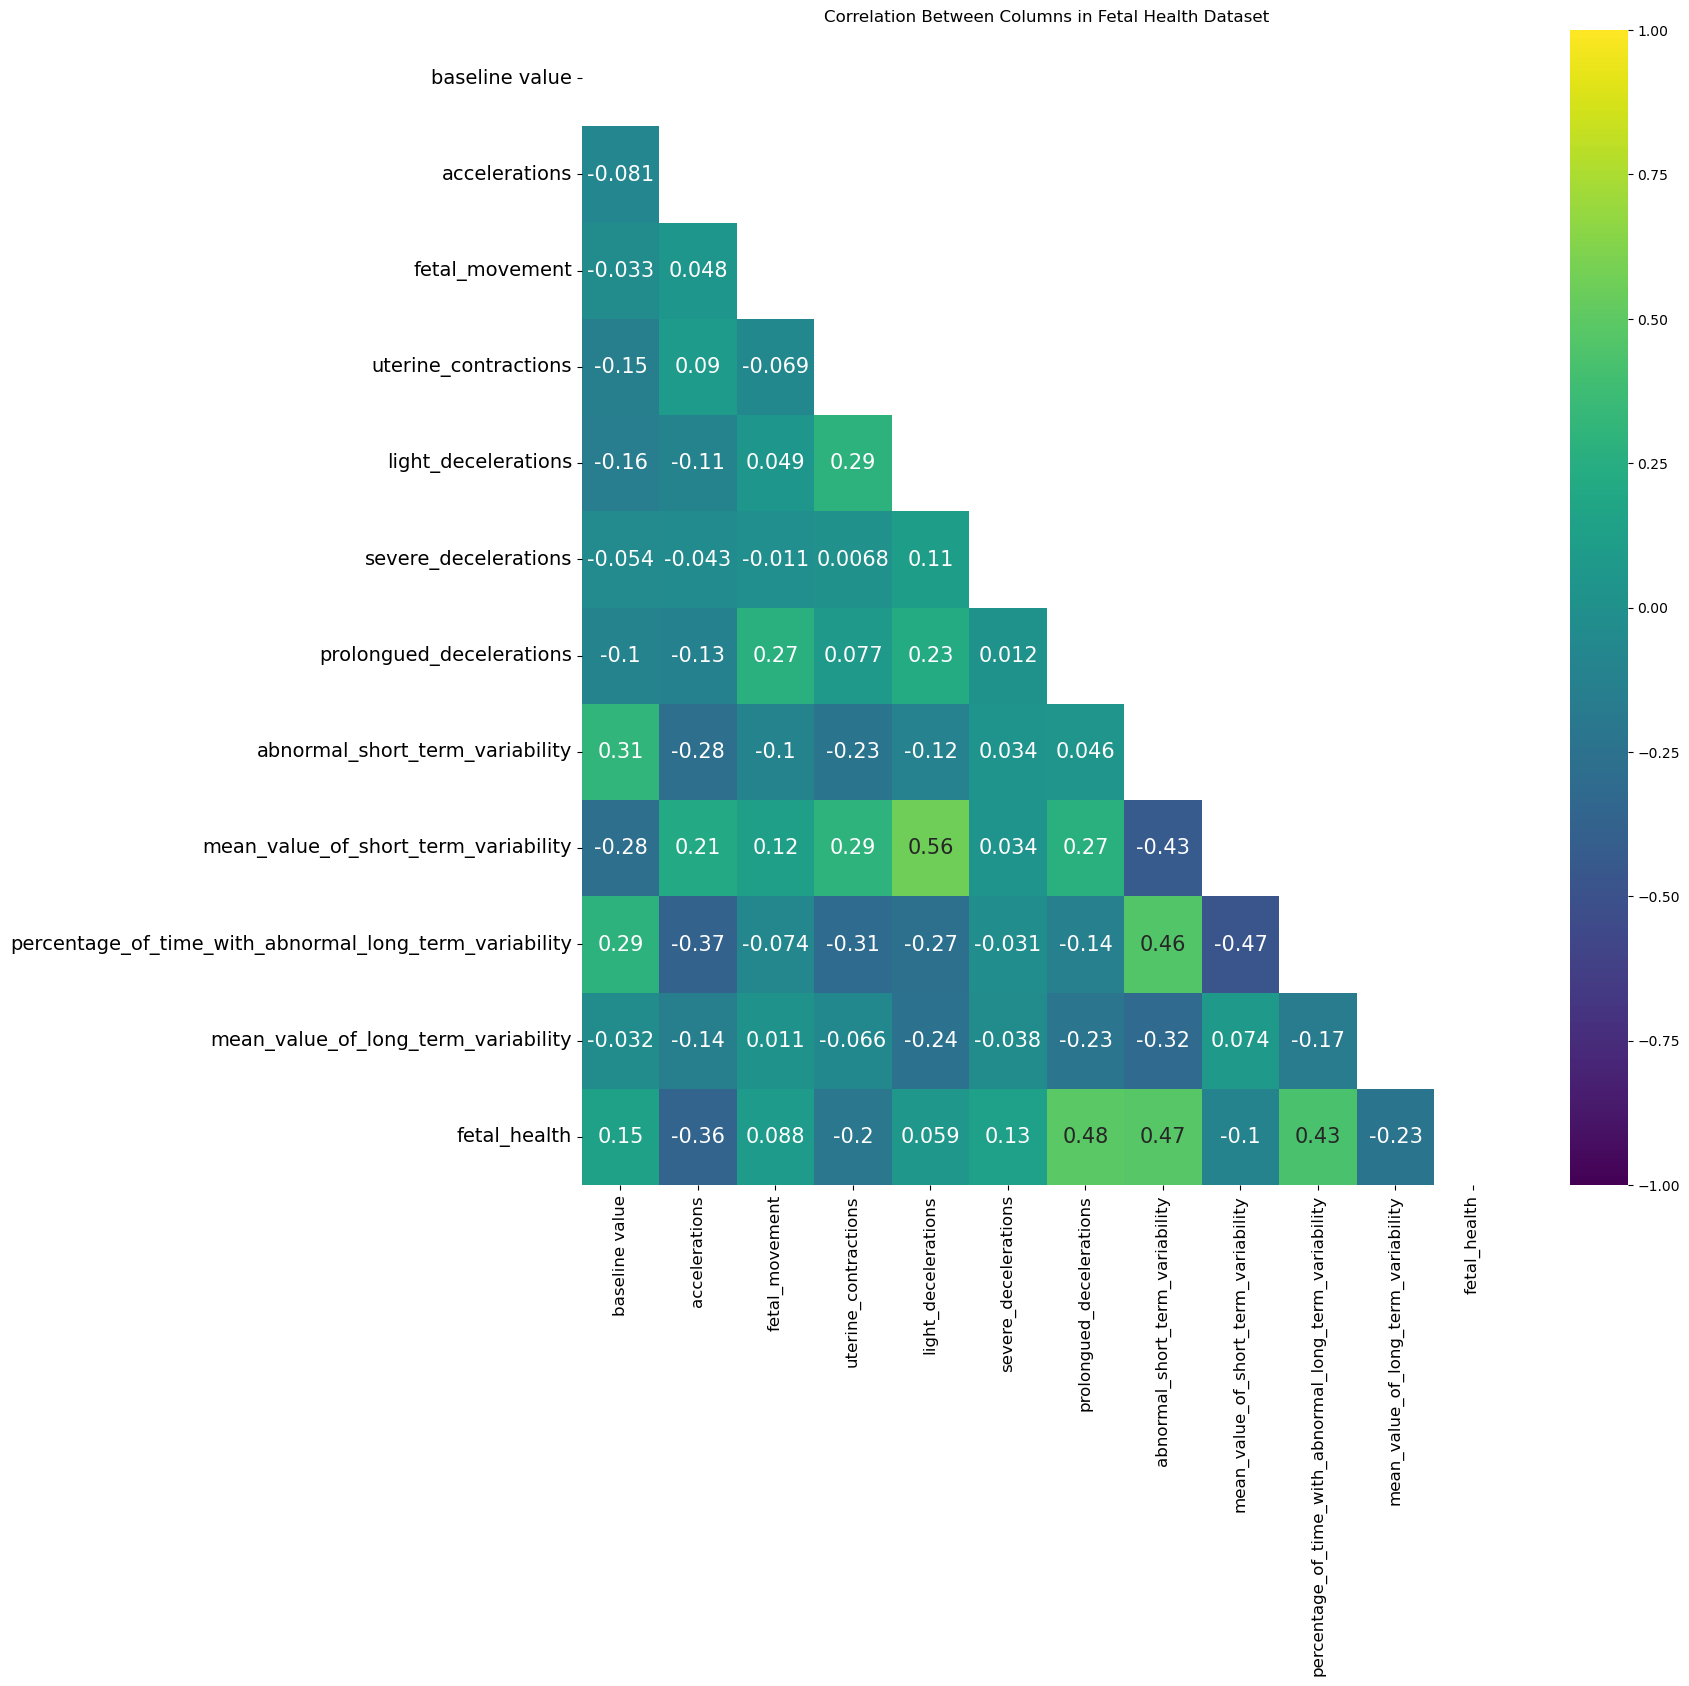

In [16]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (15,15))
sns.heatmap(corr,
            cmap = 'viridis',
            vmax = 1,
            vmin = -1,
            annot = True,
            mask = mask,
            annot_kws={'size': 15})

plt.title('Correlation Between Columns in Fetal Health Dataset')
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 12);

In [ ]:
# how to set a random seed?

### Models(basics)

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (balanced_accuracy_score, ConfusionMatrixDisplay, 
                            recall_score, precision_score, f1_score)

from sklearn.datasets import fetch_openml
from imblearn.datasets import make_imbalance

In [32]:
X = df.drop(columns = 'fetal_health')
y = df['fetal_health']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [34]:
ss = StandardScaler()

X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

### Imbalanced Classes: SMOTE

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score, f1_score

In [49]:
def best_params(pipeline, params, X_train, y_train):
    gs = GridSearchCV(pipeline,
                      param_grid = params,
                      n_jobs=-1)

    gs.fit(X_train, y_train)
    return f'Best Score: {gs.best_score_}, Params: {gs.best_params_}'

In [50]:
def return_gs(pipeline, params, X_train, y_train):
    gs = GridSearchCV(pipeline,
                      param_grid = params,
                      n_jobs=-1)
    return gs

In [51]:
def scores(gs, X_train, y_train, X_test, y_test):
    gs.fit(X_train, y_train)
    return f'Train Score: {gs.score(X_train, y_train)}, Test Score: {gs.score(X_test, y_test)}'

In [52]:
def evaluation_scores(y_test, pred):
    recall = recall_score(y_test, pred)
    precision = precision_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    accuracy = b_acc = balanced_accuracy_score(y_test, preds)
    
    return f'Recall: {recall}, Precision: {precision}, F1: {f1}, Accuracy: {accuracy}'

### Logistic Regression (Imbalanced)

In [62]:
lr_pipe = Pipeline([
    ('ss', StandardScaler()),
    ('lr', LogisticRegression(max_iter = 1000, solver = 'saga'))
])

In [63]:
lr_params = {
    'ss__with_mean': [False, True],
    'ss__with_std': [False, True],
    'lr__penalty': ['l1', 'l2', 'elasticnet', None]
}

In [64]:
best_params(lr_pipe, lr_params, X_train, y_train)

/Users/lisaliang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lisaliang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lisaliang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lisaliang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lisaliang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lisaliang/opt/anaconda3

"Best Score: 0.8883302773998935, Params: {'lr__penalty': 'l1', 'ss__with_mean': False, 'ss__with_std': True}"

In [65]:
lr_gs = return_gs(lr_pipe, lr_params, X_train, y_train)

In [66]:
scores(lr_gs, X_train, y_train, X_test, y_test)

/Users/lisaliang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lisaliang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lisaliang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lisaliang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lisaliang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lisaliang/opt/anaconda3

'Train Score: 0.8920953575909661, Test Score: 0.8627819548872181'

### Logistic Regression (SMOTE)

In [67]:
lr_smote = Pipeline([
    ('smote', SMOTE(random_state = 42)),
    ('lr', LogisticRegression(max_iter = 1000, solver = 'saga'))
])

In [68]:
lr_smote_params = {
    'smote__n_jobs': [1, 10, 50, 100],
    'smote__k_neighbors': [1, 10, 25, 50],
    'lr__penalty': ['l1', 'l2', 'elasticnet', None]
}

In [ ]:
best_params(lr_smote, lr_smote_params, X_train, y_train) # need to fix

In [ ]:
lr_gs = return_gs(lr_pipe, lr_params, X_train, y_train)

In [79]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE

In [80]:
pipe = make_pipeline(SMOTE(random_state = 34), LogisticRegression(max_iter = 1000))

In [81]:
gs = GridSearchCV(
    pipe, 
    {'logisticregression__C':[.1,1,10],}, 
    scoring='balanced_accuracy'
)

In [82]:
gs.fit(X_train_ss, y_train)

GridSearchCV(estimator=Pipeline(steps=[('smote', SMOTE(random_state=34)),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'logisticregression__C': [0.1, 1, 10]},
             scoring='balanced_accuracy')

In [83]:
gs.best_params_

{'logisticregression__C': 0.1}

In [84]:
preds = gs.predict(X_test_ss)

In [85]:
balanced_accuracy_score(y_test, preds)

0.7869499934717327

In [86]:
confusion_matrix(y_test, preds)

array([[348,  56,  10],
       [  8,  57,   9],
       [  1,  10,  33]])

In [ ]:
rfr_pipe = Pipeline([
    ('cvec', CountVectorizer(stop_words=lem_stopwords,
                             tokenizer=my_lemmatizer, 
                             token_pattern = None)),
    ('rfr', RandomForestClassifier())
])

In [ ]:
rfr_params = {
    'cvec__max_features': [4000, 5000, 7500, 9000, 15000],
    'cvec__stop_words': [None, 'english'],
    'cvec__min_df': [0, 1, 2],
    'cvec__max_df': [0.5, 0.25, 0.75],  
    'rfr__n_estimators': [100, 150, 200, 250],
    'rfr__bootstrap': [True, False]
    
}